# COGS 118A- Project Checkpoint

# Names

- Jonathan Park
- Daniel Lee
- Suebeen Noh
- Franklin Le
- Daniel Renteria

# Abstract 

The goal of our project is to use NBA player data to create a machine learning algorithm that will predict the likelihood of a player becoming an all-star. We will be looking at different player statistics from each regular season from 2011/12 through 2021/22 to create a regression line that predicts the likelihood of a player becoming an all-star. Success will be measured by testing the created model with earlier stats from players who became all-stars and seeing how accurate the predictions are.

# Background

Around halfway through each NBA season, fans and media members vote on their favorite NBA players to play in the All-Star game. Fans are able to vote through various online means such as the NBA app, NBA website, and via Twitter<a name="voting"></a>[<sup>[1]</sup>](#votinginfo), and represent 50% of the overall vote. Media members and current players make up the other 50%. Being selected as an all-star is a prestigious accomplishment, and many players take pride in the number of all-star games they participated in as a mark of their legacy and impact on basketball.

For teams, it is vital to scout and sign players that they believe have the growth potential to become all-star level players, but do not yet command an enormous salary. This is because the NBA has a salary cap system, where there is a maximum amount of money they are able to spend on player salaries in one season. In the 2021/22 season for example, the salary cap was set to 112.4 million dollars<a name="salary"></a>[<sup>[2]</sup>](#salarycapinfo). This sounds like a lot of money, but when top players make upwards of $50 million by themselves, this salary cap gets filled quickly. Because teams are looking for cheaper players with more growth potential, we believe that we can use machine learning to support the scouting systems already in place.

In terms of prior work already done on this subject, there is already a lot of work being done in this particular field. For example, ESPN created a model in 2017 to predict which draft picks are likely to become all-stars <a name="espn"></a>[<sup>[3]</sup>](#espnpredict). NBA teams often have their own analytics departments, and media outlets such as ESPN also recognize the power of using machine learning and analytics to predict which players have the most potential. We will be working to build off the wealth of knowledge afforded to us and create our own model that works as effectively as any others.

# Problem Statement

The problem we are looking to answer is to predict which NBA players have the most potential to become all-stars. We will be using a variety of player stats and variables to create a model that can predict the growth of a player, and use that predicted growth to make an educated guess about the likelihood that they will become an all-star in the future. Given that we will be using 10 seasons of player data to build our player growth model, we feel that the volume of data will be adequate to ensure that the model will have a solid base of relatively unbiased data. This problem will be able to be replicated and expanded quite easily by adding more seasons of player data and including a wider range of players. We will also be able to test the model many times because every season there are new all-stars that are selected, and we can use this information to check the accuracy of the player growth model and making accurate all-star predictions.

# Data

The data we will be using will come from an online NBA data resource called basketball-reference.com. This site includes all of the player data we will need from each season. Given that we will be working with 10 seasons of data from 2011/12 through 2021/22, we expect to have a dataset of about 5,000 - 6,000 observations and we will be looking at around 8 - 10 variables.

- Example: https://www.basketball-reference.com/leagues/NBA_2019_per_game.html
- Each season has 500 - 600 observations, so 10 seasons of data will give 5,000 - 6,000 observations.
- Each observation is a player. Each observation has 28 variables, including Games, Team, Points, Rebounds, etc. We will be reducing the number of variables to only include the most relevant ones in determining all-star selection.
- Some critical variables that will be included (but not limited to): Points per Game, 2-Point Percentage, Position, Assists per Game
- The data we will use from basketball reference is already very clean, but likely we will remove any players that were only in the NBA for 1 season (given no growth to track), players with no NBA minutes played, and reduce the number of variables we will be looking at.

In [1]:
#importing data and packages
import pandas as pd
import numpy as np
#TODO: PUT IN THE Y VALUES IN BASIC SINCE SOME PLAYERS DON'T GET ALL STAR EACH YEAR, EITHER SPLIT UP DATA FROM NBA_ALL_STARS OR USE PANDAS TO MATCH CORRECT VALUES
NBA_Data = pd.DataFrame()
All_Stars = pd.read_csv('DATA/NBA_ALL_STARS.csv', encoding = "ISO-8859-1")
per_game_cols = ['TRB', 'AST','BLK','PTS']

def name_change(a):
    name = a.split('\\')[0]
    if '*' in name:
        name = name.split('*')[0]
    return name

def returnZero(a,b):
        if a in list(b):
            return 1
        else:
            return 0

for i in range(13):
    basic = pd.read_csv(f'DATA/NBA_STATS_{2010+i}.csv')
    advanced = pd.read_csv(f'DATA/AD_NBA_STATS_{2010+i}.csv')
    cols_to_use = advanced.columns.difference(basic.columns)
    basic = pd.concat([basic, advanced[cols_to_use]],axis=1)
    pergame = pd.read_csv(f'DATA/NBA_PerGame_{2010+i}.csv')
    cols_to_use = pergame.columns.difference(basic.columns)
    pergame_rename = {'TRB': 'Rebounds Per Game', 'AST': 'Assists Per Game', 'BLK': 'Blocks Per Game','PTS': 'Points Per Game'}
    pergame.rename(columns=pergame_rename, inplace=True)
    pergame = pergame[['Rebounds Per Game', 'Assists Per Game', 'Blocks Per Game','Points Per Game']]
    basic = pd.concat([basic, pergame],axis=1)
    basic['Player'] = basic['Player'].apply(lambda x: name_change(x))
    basic.drop_duplicates(subset=['Player'], keep='first', inplace = True)
    basic['All Stars'] = basic['Player'].apply(lambda x : returnZero(x,All_Stars[str(2010+i)]))
    NBA_Data = pd.concat([NBA_Data, basic], axis=0)

In [2]:
#dropping duplicates, and unnecessary data
renameColumns = {'2P%': '2 Point Field Goal Percentage', '3P%': '3 Point Field Goal Percentage', 
                 'AST': 'Assists', 'PER': 'Player Efficiency Rating','TS%': 'True Shooting Percentage',
                 'USG%': 'Usage Percentage', 'WS/48': 'Win Shares Per 48 Minutes',
                 }
NBA_Data.rename(columns=renameColumns, inplace=True)
relevant_cols = ['Pos','Player', '3 Point Field Goal Percentage', '2 Point Field Goal Percentage', 
                'Player Efficiency Rating', 'True Shooting Percentage', 'Usage Percentage', 
                'Win Shares Per 48 Minutes', 'Rebounds Per Game', 'All Stars',
                'Assists Per Game', 'Blocks Per Game', 'Points Per Game']
NBA_Data = NBA_Data[relevant_cols]
NBA_Data.reset_index(drop=True, inplace = True)

In [3]:
#one hot encoding
np.where(NBA_Data['Pos'].isin(['PF', 'PG','SF','SG', 'C']), NBA_Data['Pos'], 'other')
posTemp = pd.get_dummies(NBA_Data['Pos'])
NBA_Data = pd.concat([NBA_Data,posTemp], axis=1)

def one_hot_multi(x):
    for i in x['Pos'].split('-'):
        x[i] = 1
    return x

NBA_Data[NBA_Data['Pos'].str.contains('-')] = NBA_Data[NBA_Data['Pos'].str.contains('-')].apply(lambda x: one_hot_multi(x), axis = 1)
NBA_Data = NBA_Data[NBA_Data.columns.drop(list(NBA_Data.filter(regex='-')))]
NBA_Data.drop(columns = ['Player','Pos'], inplace = True)
NBA_Data.rename(columns={'C':'Center','PF':'Power Forward','PG':'Point Guard','SF':'Small Forward','SG':'Shooting Guard'}, inplace=True)
NBA_Data.fillna(0, inplace=True)


In [4]:
NBA_Data[NBA_Data['All Stars'] == 1]

,3 Point Field Goal Percentage,2 Point Field Goal Percentage,Player Efficiency Rating,True Shooting Percentage,Usage Percentage,Win Shares Per 48 Minutes,Rebounds Per Game,All Stars,Assists Per Game,Blocks Per Game,Points Per Game,Center,Power Forward,Point Guard,Small Forward,Shooting Guard
13,0.316,0.478,22.2,0.548,33.4,0.145,6.6,1,3.2,0.4,28.2,0,0,0,1,0
44,0.386,0.441,20.2,0.601,24.3,0.182,3.1,1,5.6,0.1,19.5,0,0,1,0,0
53,0.364,0.521,25.0,0.592,28.7,0.182,10.8,1,2.4,1.0,24.0,1,0,0,0,0
67,0.329,0.487,21.9,0.545,32.3,0.160,5.4,1,5.0,0.3,27.0,0,0,0,0,1
122,0.182,0.522,24.7,0.560,26.0,0.215,10.1,1,3.2,1.5,17.9,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,0.353,0.524,21.8,0.578,32.1,0.169,8.0,1,4.4,0.6,26.9,0,0,0,1,0
6459,0.410,0.580,24.1,0.640,27.8,0.199,9.8,1,3.6,1.1,24.6,1,0,0,0,0
6467,0.377,0.440,17.3,0.552,23.7,0.131,4.4,1,6.7,0.5,20.3,0,0,1,0,0
6495,0.393,0.513,15.0,0.560,23.1,0.105,4.5,1,2.2,0.7,17.2,0,0,0,1,0


In [5]:
NBA_Data.groupby('All Stars').mean()

,3 Point Field Goal Percentage,2 Point Field Goal Percentage,Player Efficiency Rating,True Shooting Percentage,Usage Percentage,Win Shares Per 48 Minutes,Rebounds Per Game,Assists Per Game,Blocks Per Game,Points Per Game,Center,Power Forward,Point Guard,Small Forward,Shooting Guard
All Stars,,,,,,,,,,,,,,,
0,0.263221,0.47785,12.387349,0.518895,18.121510,0.069663,3.375617,1.676360,0.382556,7.652509,0.197676,0.208488,0.189931,0.192997,0.230757
1,0.320938,0.51691,22.286957,0.577537,27.456522,0.176602,7.032609,5.042857,0.764286,21.614596,0.183230,0.195652,0.291925,0.170807,0.164596


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = NBA_Data.loc[:, NBA_Data.columns != 'All Stars']
y = NBA_Data['All Stars']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf = LogisticRegression(class_weight='balanced',random_state=0, max_iter=1000).fit(x_train, y_train.values.ravel())
clf.score(x_test, y_test)

0.9153374233128835

In [41]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1549
           1       0.36      0.94      0.52        81

    accuracy                           0.92      1630
   macro avg       0.68      0.93      0.74      1630
weighted avg       0.97      0.92      0.93      1630



Although our clf score was high, we can see from the classification report that model was not good at predicting all stars. 
It only scored high because of the large amount of non allstars compared to allstars.

In [42]:
y.value_counts()

0    6197
1     322
Name: All Stars, dtype: int64

In [43]:
#Tried to fix the problem with Random Undersampling

new_Data = NBA_Data[NBA_Data['All Stars'] != 1].sample(322)
Smaller_Sample = pd.concat([new_Data,NBA_Data[NBA_Data['All Stars'] == 1]] , axis=0)

Smaller_Sample['All Stars'].value_counts()

new_X = Smaller_Sample.loc[:, Smaller_Sample.columns != 'All Stars']
new_y = Smaller_Sample.loc[:, Smaller_Sample.columns == 'All Stars']

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.25, random_state=0)
new_clf = LogisticRegression(random_state=0, max_iter=5000).fit(new_x_train, new_y_train.values.ravel())

new_clf.score(new_x_test, new_y_test)

0.8881987577639752

In [44]:
new_y_pred = new_clf.predict(new_x_test)
print(classification_report(new_y_test, new_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        79
           1       0.86      0.94      0.90        82

    accuracy                           0.89       161
   macro avg       0.89      0.89      0.89       161
weighted avg       0.89      0.89      0.89       161



In [45]:
y_pred = new_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1549
           1       0.34      0.93      0.50        81

    accuracy                           0.91      1630
   macro avg       0.67      0.92      0.72      1630
weighted avg       0.96      0.91      0.93      1630



However the model is not really good at generalizing the data, which means that it is still not fixing the problem of the data being unbalanced.

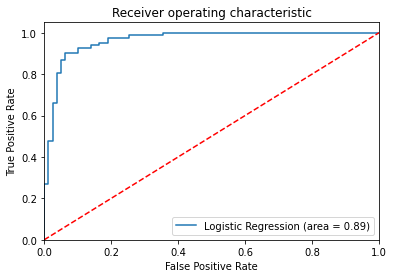

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(new_y_test, new_clf.predict(new_x_test))
fpr, tpr, thresholds = roc_curve(new_y_test, new_clf.predict_proba(new_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

We plan on using logisical regression and predict the next future all stars by trying to predict the 'All Stars' varaible 1 = yes and 0 = no, based off the other per-game stats. We will be using the data from col = ['Pos','Player', '3 Point Field Goal Percentage', '2 Point Field Goal Percentage', 
                'Player Efficiency Rating', 'True Shooting Percentage', 'Usage Percentage', 
                'Win Shares Per 48 Minutes', 'Rebounds Per Game',
                'Assists Per Game', 'Blocks Per Game', 'Points Per Game'] as the X and have the 'All Stars' variable be the Y.

Although we were unfortunately unable to create the regression model for now, one idea that comes to mind is creating a logistical regression model that only uses data, aka their per game stats, from 
past all stars. Then, using this model, we can perhaps place this model with the rest of the nba player's stats and see which players are closest to this model (have the smallest error). 

Another proposed idea may be a classification model. This model will use data from past all stars to create a decision boundary. This any player that passes this boundary will be predicted as an 
all star and those who do not pass this boundary will not. One potential problem with this issue is the concept of positions in the nba.

One potential problem that will occur is how to determine the next all stars if there are too many good players in a given position. For example, the top 10 players in the league stats-wise might 
all be guards, but because the all-star selection is based off position, only 4 guards will be selected instead of all 10. One way to fix this problem may be to differentiate players off their positions, 
however this may not guarantee good results and may lead to inaccuracies in the predictions.

# Proposed Solution

Although the problem statement may still be subject to change, the current proposed problem statement is to create a machine learning program that could predict the success of a player based on their stats, measuring success as being part of an all-star team selection. We will use past all stars as the training subjects and test on this year’s all stars to determine how accurate the program is. One way that we can program this machine learning algorithm is by creating a boundary line that can separate non-allstars from all-stars. 

This might not be a viable solution due to the sheer number of ways players can impact winning basketball, but since nba all-stars historically are chosen due to their offensive impact, creating a boundary that favors offensive statistics like points and assists may help in creating a more accurate boundary. If there happens to be more than the total amount of all-star selections available, the program can choose players that are farther away from the boundary relative to other players and vice versa for the opposite scenario.

# Evaluation Metrics

One metric thet we'll be using is Precision. The reason we'll be using Precision is because there are more NBA Players that do not become All Stars than there are that do make it. Since it's highly selective, we believe that that there will be various false positives in our data sets since the stats could be so similar. The formula for precision is: $$ \frac{True \ Positive}{True \ Positive \ + False \ Positive} $$

We will also be using an F1-Score in order to see where the cut off is in our model. We went against ROC because this data is not balanced. In order to find the F1 score, you must know recall, which is $$ \frac{True \ Positive}{True \ Positive \ + False \ Neative} $$
then you can get F1, which is: $$F_{\beta} = (1+\beta^2)\frac{Precision \cdot Recall}{\beta^2 \cdot Precision + Recall} $$

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



# Ethics & Privacy

Our datasets are from a public datasets with credible sources and not violating any privacy or terms of use agreement. Also, our datasets are not in the format of self-reported nor survey which removes any forms of biases. Most of our data is based on accurate statistical seasonal records of players from the NBA itself and other credible sources that put the focus only on the NBA statistics. The statistical seasonal records of NBA players is not used to expose any personal information nor criticize the players, but to help to analyze the statistics seasonal records of NBA players and predict who would be the next all-star player.

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* Communicating about when you are unable to do your part for some reason.
* Willing to make time for team meetings.
* Doing the work that you commit yourself to in the team meetings.
* Even splitting of workload.
* Completing tasks in a timely manner.

# Project Timeline Proposal

Update accordingly

| Meeting Date  | Meeting Time | Objectives  | 
|---|---|---|---|
| 4/23  |  11 AM |  Brainstorm project ideas/datasets, communicate group guidelines (forms of communication, schedules, roles), complete Project Proposal  | 
| 4/30  |  11 AM |  Peer review of proposals, do background research, discuss datasets and cleaning, discuss ethics | 
| 5/7  | 11 AM  | data wrangling and possible analytical approaches, combine various datasets to create new views, assign group members to lead each specific part  | 
| 5/14  | 11 AM  | Review/edit data wrangling, discuss analysis plan, edit project code, Checkpoint | 
| 5/21  | 11 AM  | Peer review checkpoint, visualize data, discuss/edit project code | 
| 5/28  | 11 AM  | Discuss/edit full project| 
| 6/4  | 11 AM  | Have project ready for turn in on 6/8, team evaluation survey  | 

# Footnotes
<a name="votinginfo"></a>1.[^](#voting): Greer, J. (20 Jan 2022) NBA All-Star voting 2022: How it works, fan vote end date, latest results & leaders. *The Sporting News*. https://www.sportingnews.com/us/nba/news/nba-all-star-voting-2022-how-it-works-leaders-results-end-date/1ubkauu43tcfq1xoqp80sck14g<br> 
<a name="salarycapinfo"></a>2.[^](#salary): NBA. (2 Aug 2021) Salary cap set at Hundred twelve point four million for 2021-22 season. *NBA*. https://www.nba.com/news/salary-cap-set-at-112-4-million-for-2021-22-season<br>
<a name="espnpredict"></a>3.[^](#espn): Sabin, P. (20 Jun 2017) Analytics help separate the All-Stars from the potential busts. *ESPN*. https://www.espn.com/nba/story/_/id/19681478/most-likely-all-stars-starters-role-players-top-2017-nba-draft<br>